# 1. Import and Install Dependencies

## 1.1 Install Dependencies

In [ ]:
#!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 tensorflow-io matplotlib

## 1.2 Load Dependencies

In [32]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf 
import tensorflow_io as tfio
from audio_utils import read_file_properties as auprops
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import librosa

# 2. Build Data Loading Function

## 2.1 Define Paths to Files

In [2]:
DATA_DIR = 'data'
METADATA = os.path.join(DATA_DIR, "metadata.csv")
#AUDIO_DIR = os.path.join(DATA_DIR, "UrbanSound8K", "audio")

## Label Encoding

In [3]:
label_encoder = OneHotEncoder()

classes = os.listdir(DATA_DIR)
classes.sort()
classes = np.array(classes).reshape(-1, 1)

label_encoder.fit(classes)
#labels = label_encoder.transform(classes).toarray()
#original_data = label_encoder.inverse_transform(labels)

def idx2label(idx):
    idx_reshaped = idx.reshape(1, -1)
    return label_encoder.inverse_transform(idx_reshaped)[0][0]

def label2idx(label):
    label = np.array(label).reshape(-1, 1)
    return label_encoder.transform(label).toarray()[0]

In [4]:
idx2label(label2idx('Parsed_Capuchinbird_Clips'))

'Parsed_Capuchinbird_Clips'

## Observe the data

In [5]:
CAPUCHIN_FILE = os.path.join('data', 'Parsed_Capuchinbird_Clips', 'XC3776-3.wav')
NOT_CAPUCHIN_FILE = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips', 'afternoon-birds-song-in-forest-0.wav'),

In [6]:
auprops(filename=CAPUCHIN_FILE) # num_channels, sample_rate, bit_depth, avg_rms, length_in_seconds, length_in_frames

(1, 44100, 16, 0.22295159, 3.0, 132300)

In [9]:
!pip install --upgrade pandas

   ---------------------------------------- 0.0/10.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.7 MB 1.7 MB/s eta 0:00:07
   ---------------------------------------- 0.1/10.7 MB 1.7 MB/s eta 0:00:07
    --------------------------------------- 0.2/10.7 MB 1.8 MB/s eta 0:00:06
    --------------------------------------- 0.2/10.7 MB 1.5 MB/s eta 0:00:07
    --------------------------------------- 0.3/10.7 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.3/10.7 MB 1.6 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.7 MB 1.7 MB/s eta 0:00:07
   - -------------------------------------- 0.4/10.7 MB 1.5 MB/s eta 0:00:07
   - -------------------------------------- 0.5/10.7 MB 1.4 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.7 MB 1.3 MB/s eta 0:00:08
   - -------------------------------------- 0.5/10.7 MB 1.4 MB/s eta 0:00:08
   -- ------------------------------------- 0.6/10.7 MB 1.4 MB/s eta 0:00:08
   -- 

  You can safely remove it manually.
  You can safely remove it manually.


In [28]:
# Analyze dataset:
# List all the files in dictionare and subdictionaries.
metadata = []

for root, _, files in os.walk(DATA_DIR):
    for i, file in enumerate(files):
        if file.endswith('.wav'):
            filename = os.path.join(root, file)
            label = os.path.basename(root)
            class_ = label2idx(label)
            num_channels, sample_rate, bit_depth, avg_rms, length_in_seconds, length_in_frames = auprops(filename)
            metadata.append({
                'filename': filename, 
                'label': label, 
                'class': class_,
                'num_channels': num_channels, 
                'sample_rate': sample_rate, 
                'bit_depth': bit_depth, 
                'avg_rms': avg_rms, 
                'length_in_seconds': length_in_seconds, 
                'length_in_frames': length_in_frames
            })

            print(f"Processed {i} file. {file}")
        else:
            print(f"Skipped {i} file. {file}")
            
metadata = pd.DataFrame(metadata)
metadata.to_csv(METADATA, index=False)

Skipped 0 file. recording_00.mp3
Skipped 1 file. recording_01.mp3
Skipped 2 file. recording_02.mp3
Skipped 3 file. recording_03.mp3
Skipped 4 file. recording_04.mp3
Skipped 5 file. recording_05.mp3
Skipped 6 file. recording_06.mp3
Skipped 7 file. recording_07.mp3
Skipped 8 file. recording_08.mp3
Skipped 9 file. recording_09.mp3
Skipped 10 file. recording_10.mp3
Skipped 11 file. recording_11.mp3
Skipped 12 file. recording_12.mp3
Skipped 13 file. recording_13.mp3
Skipped 14 file. recording_14.mp3
Skipped 15 file. recording_15.mp3
Skipped 16 file. recording_16.mp3
Skipped 17 file. recording_17.mp3
Skipped 18 file. recording_18.mp3
Skipped 19 file. recording_19.mp3
Skipped 20 file. recording_20.mp3
Skipped 21 file. recording_21.mp3
Skipped 22 file. recording_22.mp3
Skipped 23 file. recording_23.mp3
Skipped 24 file. recording_24.mp3
Skipped 25 file. recording_25.mp3
Skipped 26 file. recording_26.mp3
Skipped 27 file. recording_27.mp3
Skipped 28 file. recording_28.mp3
Skipped 29 file. recordi

In [29]:
metadata.head()

,filename,label,class,num_channels,sample_rate,bit_depth,avg_rms,length_in_seconds,length_in_frames
0,data\Parsed_Capuchinbird_Clips\XC114131-0.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.008838,2.5,120000
1,data\Parsed_Capuchinbird_Clips\XC114131-1.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.007954,3.0,144000
2,data\Parsed_Capuchinbird_Clips\XC114131-2.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.007164,3.5,168000
3,data\Parsed_Capuchinbird_Clips\XC114131-3.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.007278,3.0,144000
4,data\Parsed_Capuchinbird_Clips\XC114131-4.wav,Parsed_Capuchinbird_Clips,"[0.0, 1.0, 0.0]",2,48000,16,0.006439,3.5,168000


In [31]:
print(metadata["label"].value_counts())

label
Parsed_Not_Capuchinbird_Clips    593
Parsed_Capuchinbird_Clips        217
Name: count, dtype: int64


data\Parsed_Capuchinbird_Clips\XC114131-0.wav
data\Parsed_Not_Capuchinbird_Clips\afternoon-birds-song-in-forest-0.wav


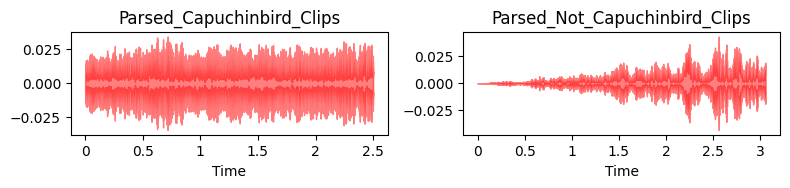

In [39]:
labels = metadata["label"].unique()

fig = plt.figure(figsize=(8,8))

fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, label in enumerate(labels):
    filtered_df = metadata[metadata["label"] == label]
    slice_file_name = filtered_df["filename"].iloc[0]
    fold = filtered_df["label"].iloc[0]
    fig.add_subplot(5, 2, i+1)
    plt.title(label)
    data, sr = librosa.load(os.path.join(slice_file_name))
    librosa.display.waveshow(y = data, sr=sr, color="r", alpha=0.5, label='Harmonic')
    print(slice_file_name)
     
plt.tight_layout()  # This will adjust spacing between subplots to prevent overlap
plt.show()  # This will display the plot

In [41]:
# Audiofile properties

metadata.head()

# num of channels 
print("Channels: ")
print(metadata.num_channels.value_counts(normalize=True))

# sample rates 
print("Sample Rates: ")
print(metadata.sample_rate.value_counts(normalize=True))

# bit depth
print("Bit Depth: ")
print(metadata.bit_depth.value_counts(normalize=True))

# length in samples
print("Samples: ")
print(metadata.length_in_frames.value_counts())

# RMS
# print(audiodf.avg_rms.describe())

Channels: 
num_channels
2    0.858025
1    0.141975
Name: proportion, dtype: float64
Sample Rates: 
sample_rate
44100    0.867901
48000    0.118519
11025    0.013580
Name: proportion, dtype: float64
Bit Depth: 
bit_depth
16    1.0
Name: proportion, dtype: float64
Samples: 
length_in_frames
132741    55
154350    51
133138    49
134064    39
132388    38
          ..
167359     1
147117     1
143502     1
220500     1
135166     1
Name: count, Length: 104, dtype: int64


## 2.2 Audio Preprocessing:

In [42]:
# Slice for common length of 3 seconds
def slice_audio(librosa_audio, librosa_sample_rate = 22050):
    SAMPLE_LENGTH = 1 * librosa_sample_rate

    librosa_audio_sliced = librosa_audio[:SAMPLE_LENGTH]
    if len(librosa_audio) < SAMPLE_LENGTH:
        # print(f"Audio length {len(librosa_audio)} is less than 2 seconds. Padding with zeros.")
        # np.pad specifies the number of values to add at the beginning and the end of the librosa_audio array.
        # 0 -> no padding in the beginning.
        # SAMPLE_LENGTH - len(librosa_audio) -> number of zeros to end, ensuring the total length is 2 seconds.
        librosa_audio_sliced = np.pad(librosa_audio, (0, SAMPLE_LENGTH - len(librosa_audio)), constant_values=0)
    return librosa_audio_sliced

# print(f"Librosa audio before: {librosa_audio.shape} and after: {slice_audio(librosa_audio).shape}")

In [43]:
def extract_mel_spectrogram(audio_path):
    
    audio_file, librosa_sample_rate = librosa.load(audio_path)
    audio_file = slice_audio(audio_file, librosa_sample_rate)

    spectrogram = librosa.feature.melspectrogram(y = audio_file, sr=librosa_sample_rate, n_mels=128, dtype=np.float32)
    spectrogram = (librosa.power_to_db(spectrogram, ref=np.max))
    #librosa.display.specshow(spectrogram, sr=librosa_sample_rate, x_axis='time')

    # spectrogram = tf.expand_dims(spectrogram, axis = 2)

    return spectrogram

## 2.3 Plot Wave

# 3. Create Tensorflow Dataset

## 3.1 Define Paths to Positive and Negative Data

In [ ]:
POS = os.path.join('data', 'Parsed_Capuchinbird_Clips')
NEG = os.path.join('data', 'Parsed_Not_Capuchinbird_Clips')

## 3.2 Create Tensorflow Datasets

In [ ]:
pos = tf.data.Dataset.list_files(POS+'\*.wav')
neg = tf.data.Dataset.list_files(NEG+'\*.wav')

## 3.3 Add labels and Combine Positive and Negative Samples

In [ ]:
positives = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negatives = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))
data = positives.concatenate(negatives)

# 4. Determine Average Length of a Capuchin Call

## 4.1 Calculate Wave Cycle Length

In [ ]:
lengths = []
for file in os.listdir(os.path.join('data', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('data', 'Parsed_Capuchinbird_Clips', file))
    lengths.append(len(tensor_wave))

## 4.2 Calculate Mean, Min and Max

In [ ]:
tf.math.reduce_mean(lengths)

In [ ]:
tf.math.reduce_min(lengths)

In [ ]:
tf.math.reduce_max(lengths)

# 5. Build Preprocessing Function to Convert to Spectrogram

## 5.1 Build Preprocessing Function

In [ ]:
def preprocess(file_path, label): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram, label

## 5.2 Test Out the Function and Viz the Spectrogram

In [ ]:
filepath, label = positives.shuffle(buffer_size=10000).as_numpy_iterator().next()

In [ ]:
spectrogram, label = preprocess(filepath, label)

In [ ]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectrogram)[0])
plt.show()

# 6. Create Training and Testing Partitions

## 6.1 Create a Tensorflow Data Pipeline

In [ ]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

## 6.2 Split into Training and Testing Partitions

In [ ]:
train = data.take(36)
test = data.skip(36).take(15)

## 6.3 Test One Batch

In [ ]:
samples, labels = train.as_numpy_iterator().next()

In [ ]:
samples.shape

# 7. Build Deep Learning Model

## 7.1 Load Tensorflow Dependencies

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten

## 7.2 Build Sequential Model, Compile and View Summary

In [ ]:
model = Sequential()
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(1491, 257,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('Adam', loss='BinaryCrossentropy', metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
model.summary()

## 7.3 Fit Model, View Loss and KPI Plots

In [ ]:
hist = model.fit(train, epochs=4, validation_data=test)

In [ ]:
plt.title('Loss')
plt.plot(hist.history['loss'], 'r')
plt.plot(hist.history['val_loss'], 'b')
plt.show()

In [ ]:
plt.title('Precision')
plt.plot(hist.history['precision'], 'r')
plt.plot(hist.history['val_precision'], 'b')
plt.show()

In [ ]:
plt.title('Recall')
plt.plot(hist.history['recall'], 'r')
plt.plot(hist.history['val_recall'], 'b')
plt.show()

# 8. Make a Prediction on a Single Clip

## 8.1 Get One Batch and Make a Prediction

In [ ]:
X_test, y_test = test.as_numpy_iterator().next()

In [ ]:
yhat = model.predict(X_test)

## 8.2 Convert Logits to Classes 

In [ ]:
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

# 9. Build Forest Parsing Functions

## 9.1 Load up MP3s

In [ ]:
def load_mp3_16k_mono(filename):
    """ Load a WAV file, convert it to a float tensor, resample to 16 kHz single-channel audio. """
    res = tfio.audio.AudioIOTensor(filename)
    # Convert to tensor and combine channels 
    tensor = res.to_tensor()
    tensor = tf.math.reduce_sum(tensor, axis=1) / 2 
    # Extract sample rate and cast
    sample_rate = res.rate
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # Resample to 16 kHz
    wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
    return wav

In [ ]:
mp3 = os.path.join('data', 'Forest Recordings', 'recording_00.mp3')

In [ ]:
wav = load_mp3_16k_mono(mp3)

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)

In [ ]:
samples, index = audio_slices.as_numpy_iterator().next()

## 9.2 Build Function to Convert Clips into Windowed Spectrograms

In [ ]:
def preprocess_mp3(sample, index):
    sample = sample[0]
    zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32)
    wav = tf.concat([zero_padding, sample],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

## 9.3 Convert Longer Clips into Windows and Make Predictions

In [ ]:
audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=16000, sequence_stride=16000, batch_size=1)
audio_slices = audio_slices.map(preprocess_mp3)
audio_slices = audio_slices.batch(64)

In [ ]:
yhat = model.predict(audio_slices)
yhat = [1 if prediction > 0.5 else 0 for prediction in yhat]

## 9.4 Group Consecutive Detections

In [ ]:
from itertools import groupby

In [ ]:
yhat = [key for key, group in groupby(yhat)]
calls = tf.math.reduce_sum(yhat).numpy()

In [ ]:
calls

# 10. Make Predictions

## 10.1 Loop over all recordings and make predictions

In [ ]:
results = {}
for file in os.listdir(os.path.join('data', 'Forest Recordings')):
    FILEPATH = os.path.join('data','Forest Recordings', file)
    
    wav = load_mp3_16k_mono(FILEPATH)
    audio_slices = tf.keras.utils.timeseries_dataset_from_array(wav, wav, sequence_length=48000, sequence_stride=48000, batch_size=1)
    audio_slices = audio_slices.map(preprocess_mp3)
    audio_slices = audio_slices.batch(64)
    
    yhat = model.predict(audio_slices)
    
    results[file] = yhat

In [ ]:
results

## 10.2 Convert Predictions into Classes

In [ ]:
class_preds = {}
for file, logits in results.items():
    class_preds[file] = [1 if prediction > 0.99 else 0 for prediction in logits]
class_preds

## 10.3 Group Consecutive Detections

In [ ]:
postprocessed = {}
for file, scores in class_preds.items():
    postprocessed[file] = tf.math.reduce_sum([key for key, group in groupby(scores)]).numpy()
postprocessed

# 11. Export Results

In [ ]:
import csv

In [ ]:
with open('results.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=',')
    writer.writerow(['recording', 'capuchin_calls'])
    for key, value in postprocessed.items():
        writer.writerow([key, value])